## Final Exam STA208, S24:   due Tue, June 11, 2024

Name all the team members and provide a description of the contribution of the individual team mambers to this project.

- Name 1: Ian Dimapasok

    - Contributions: kernel SVM, PCA, kernel PCA and tSNE


- Name 2: Ben Jewell

    - Contributions: Linear SVM, KNN Classifier, KDE algorithm


- Name 3: Leena Qureshi

    - Contributions: Logistic regression, tSNE and PCA



## Part 1: Methodology

1) Let $f_1,\ldots,f_K$ be densities on the real line, and let $\alpha_1,\ldots,\alpha_K$ be positive weights with $\sum_{i=1}^K \alpha_i= 1$. Define the mixture density

$$f_{\text{mix}}(x) = \alpha_1 f_1(x) + \cdots + \alpha_K f_K(x).$$

Suppose you know how to draw samples from the densities $f_i(x), i = 1,\ldots,K.$ Describe an algorithm for drawing samples from $f_{\text{mix}}(x).$


**Put answer to question 1) here:**

Arrange your weights so that you have a number of decision bounds between 0 and 1, then draw a random number from a $\text{Uniform}(0, 1)$ random variable. Then you can figure out which weight $\alpha_i$ that belongs to, and draw a standard sample from the given $f_i(x)$.




2) Consider a binary classification problem in ${\mathbb R}^2$ using Gaussian Naive Bayes. Recall that Gaussian Naive Bayes is using the assumption of normal marginal class densities.
    - Explain why the decision boundary is a quadratic function.
    - How does this generalize to multiclass classification.
   

**Put answer to question 2) here:**
We know that when $\pi P(Y = 1 | X = x) = (1 - \pi) P(Y = 0 | X = x)$ we get the decision boundry for naive Bayes. In this case we are also taking $f_0$ and $f_1$ to simply being the joint probabilities of two normal distributions $X_2 \sim N(\mu_0, \sigma_0^2)$ and $X_1 \sim N(\mu_1, \sigma_1^2)$, where the $x$ values are the same. Plugging these into our equation, we can see we get:
$$=\frac{P(Y = 1 |X = x)}{P(Y = 0 | X = x)} = \frac{1 - \pi}{\pi}$$
$$=\frac{P(Y = 1, X = x) / P(X = x)}{P(Y = 0, X = X)/ P(X = x)} = \frac{1 - \pi}{\pi}$$
$$ = \frac{P(X = x | Y = 1)}{P(X = x | Y = 0)} = \frac{1 - \pi}{\pi}$$

We know these distributions, $f_0$ and $f_1$, as defined above, with d = 2.
$$\frac{(2\pi\sigma_1^2)^{-1} \exp(\frac{-1}{2\sigma_0^2}\sum^2_{j =1}(x_j - \mu_1)^2)}{(2\pi\sigma_0^2)^{-1} \exp(\frac{-1}{2\sigma_0^2}\sum^2_{j =1}(x_j - \mu_0)^2)} = \frac{1 - \pi}{\pi}$$

$$ \frac{\sigma_1^2}{\sigma_0^2} \cdot \exp(\frac{-1}{2}(\frac{1}{\sigma_1^2}\sum^2_{j =1}(x_j - \mu_1)^2 - \frac{1}{\sigma_0^2}\sum^2_{j =1}(x_j - \mu_0)^2)) = \frac{1 - \pi}{\pi}$$

To further reduce this we take the log of both sides:

$$ -2\log(\frac{\sigma_1^2(1 - \pi)}{\sigma_0^2\cdot\pi}) = \frac{1}{\sigma_1^2}\sum^2_{j =1}(x_j - \mu_1)^2 - \frac{1}{\sigma_0^2}\sum^2_{j =1}(x_j - \mu_0)^2$$

$$ -2\log(\frac{\sigma_1^2(1 - \pi)}{\sigma_0^2\cdot\pi}) = \frac{1}{\sigma_1^2}(\sum^2_{j =1}x_j^2 - 4\bar{x}\mu_1 + 2\mu_1^2) - \frac{1}{\sigma_0^2}(\sum^2_{j =1}x_j^2 - 4\bar{x}\mu_0 + 2\mu_0^2)$$

$$ -2\log(\frac{\sigma_1^2(1 - \pi)}{\sigma_0^2\cdot\pi}) = (\frac{1}{\sigma_1^2} - \frac{1}{\sigma_0^2})\sum^2_{j =1}x_j^2 - 4\bar{x}(\frac{\mu_1}{\sigma_1^2} - \frac{\mu_0}{\sigma_0^2}) + 2((\frac{\mu_1}{\sigma_1})^2 - (\frac{\mu_0}{\sigma_0})^2)$$

$$ 0 = (\frac{1}{\sigma_1^2} - \frac{1}{\sigma_0^2})\sum^2_{j =1}x_j^2 - 4\bar{x}(\frac{\mu_1}{\sigma_1^2} - 2\frac{\mu_0}{\sigma_0^2}) + 2(\frac{\mu_1}{\sigma_1})^2 - (\frac{\mu_0}{\sigma_0})^2 + 2\log(\frac{\sigma_1^2(1 - \pi)}{\sigma_0^2\cdot\pi})$$

Thus we can see that the decision boundry is a quadratic function on x. We can see that because d = 2, this can easily be expanded to encompass higher dimensions, we will just have a larger 2nd and 3rd term.

## Part 2: Data analysis: instructions

Use the MNIST data to do the following:

 1) Fit the following classification algorithms to the (high-dimensional) MNIST data:
        
       - logistic regression (ovr)
       - linear SVM (ovr)
       - kernel SVM with rbf kernel (ovr)
       - KNN
     
     and
     
       - compare their performance on the test set

 2) This part is about dimension reduction/visualization:

     - Visualize the MNIST training data in 2 dimensions using

        - PCA
        - t-SNE             
       
    - Use the KNN classification algorithm to cluster the embeddings and to cluster the original (high-dimensional) data; discuss the results.

 3) Since t-SNE (used above) has not been discussed in class, you are asked to learn about it (as part of this final project) and to describe what you have understood.

4) Data augmentation: Use the following bootstrap procedure to augment the MNIST data set by images that follow a similar distribution in the space of images. The basic idea is this:


    1.   consider the k-dimensional PCA embeddings as data (we think of k to be small, let's say $k \le 5$);
    2.   find the gaussian KDE based on the data from A.
    3.   draw samples from this KDE;
    4.   use the samples from C. to reconstruct new images by using the first k eigenvectors and the k-dimensional samples from;

     
   To achieve this, proceed as follows:
      - recall Problem 1 from the Methodology part; this should help you with implementing a function "sample_gauss_KDE" that takes as input the number $N$ of samples to draw; the data and the bandwith for finding the KDE. The output of this function should be the N samples drawn from a distribution whose pdf is given by the KDE; (your function sample_gauss_KDE should work for data in any dimension);
      - apply sample_gauss_KDE to the k-dimensional PCA embeddings as input data
      - implement a function "image_reconst" that takes as input the number $k$ of summands to use in the "reconstruction", the corresponding k eigenfunctions (from running PCA on the MNIST data), and k samples from the KDE; the output is a new image; (note that while we are calling it a reconstruction, it only reconstructs an image in the data base if we use one of the observed points of the PCA embeddings; instead you are using embedding points with "some randomness added"... this is where the 'smooth bootstrap' enters.)
      
   Using the above approach, construct 9 new images and plot them in a figure using a 3 x 3 layout.
         
</br>         
         
**IMPORTANT:** You will get points for how you
- describe and interprete the outcomes of your analysis
- compare different methodologies;
- describe your rational or methods that went into choosing tuning parameters;
- discuss possible other insights you gained while working on this assignment (such as runtime; effects of choice of "random_state", etc.)

- if needed, **reduce the size of the data further** and describe what you did and why
- **add new cells to this notebook where needed** (either code cells, or text cells to add your comments/descriptions of your thoughts etc.)

### Importing the MNIST data

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist

from sklearn import model_selection, svm
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [3]:
#loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()


11490434/11490434 [==============================] - 1s 0us/step


**2.1** Plot figures 1-9 into a 3 x 3 grid of images

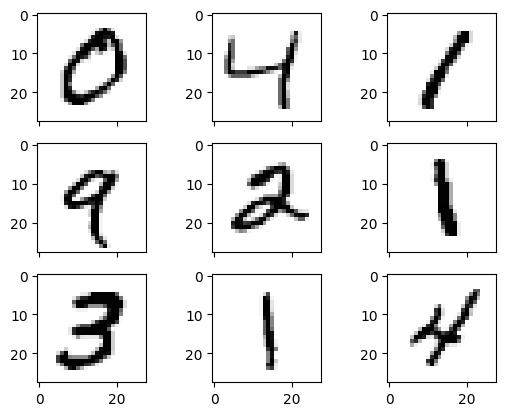

In [13]:
fig, axs = plt.subplots(3, 3, sharex=True)

k = 0
for i in range(3):
  for j in range(3):
    k += 1
    axs[i][j].imshow(X_train[k], cmap = 'Greys')

plt.show()

To make computations feasible, we reduce the size of the training data to 15,000, and we also normalize so that all the pixel values lie in [0,1].

In [4]:
X_tr = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2])[0:15000,:]/255
X_te = X_test.reshape(-1,X_test.shape[1]*X_test.shape[2])/255

y_tr = y_train[0:15000]
y_te = y_test

**2.2 Determine the train-test split ratio:**

In [14]:
test_size = X_te.shape[0] / (X_tr.shape[0] + X_te.shape[0])
train_size = 1 - test_size

print("Train size:", train_size)
print("Test size:", test_size)

Train size: 0.6
Test size: 0.4


**2.3 Classification of original data: Apply logistic regression, linear and kernel SVM and KNN classifiers and compare performance**

**2.3.1 Classification using multiclass logistic regression**

In [ ]:
#grid search to find best combination of parameters

#parameter grid
param_grid = {
    'C': [0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' solver supports both l1 and l2 penalties
}

In [ ]:
logreg = LogisticRegression(max_iter=1000)

#grid search
grid_search = GridSearchCV(logreg, param_grid, cv=5, scoring='accuracy')

#fit grid search to the data
grid_search.fit(X_tr, y_tr)

#best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Accuracy:", best_score)

In [29]:
logreg = LogisticRegression(C=0.50, penalty='l1', solver='liblinear', max_iter=1000)

#fit model
logreg.fit(X_tr, y_tr)

#predict on the test set
y_log_pred = logreg.predict(X_te)

#calculate accuracy
accuracy = accuracy_score(y_te, y_log_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9114


The accuracy of our logisitc regression model is 0.9114.

**2.3.2 Classification using multiclass linear SVM**

In [ ]:
#Greedy search for best parameters
for c in [0.01, 0.1, 0.3, 0.5, 0.7, 1, 3, 5, 7, 9]:
  mnist_svm = svm.SVC(kernel = 'linear', C = c)
  mnist_svm.fit(X_tr, y_tr)
  msvm_pred = mnist_svm.predict(X_te)
  acc = accuracy_score(y_te, msvm_pred)
  print(f'Accuracy Score for Linear C {c}: {acc}')

Accuracy Score for Linear C 0.01: 0.9326
Accuracy Score for Linear C 0.1: 0.9341
Accuracy Score for Linear C 0.3: 0.9279
Accuracy Score for Linear C 0.5: 0.9244
Accuracy Score for Linear C 0.7: 0.9226
Accuracy Score for Linear C 1: 0.9219
Accuracy Score for Linear C 3: 0.9192
Accuracy Score for Linear C 5: 0.917
Accuracy Score for Linear C 7: 0.9158
Accuracy Score for Linear C 9: 0.9163


In [18]:
#Our final model for SVM
mnist_svm = svm.SVC(kernel = 'linear', C = 0.1)
mnist_svm.fit(X_tr, y_tr)
msvm_pred = mnist_svm.predict(X_te)
acc = accuracy_score(y_te, msvm_pred)
print(f'Accuracy Score for Linear: {acc}')

Accuracy Score for Linear: 0.9341


**2.3.3 Classification using multiclass kernel SVM with rbf kernel**

In [21]:
# Fit the SVM with the rbf kernel
ksvm = svm.SVC(kernel='rbf', C=1, gamma = 'scale')
ksvm.fit(X_tr, y_tr)

#Make predictions on the testing dataset
y_predict_svm = ksvm.predict(X_te)

#Get the accuracy scores for the testing datasets
accuracy = accuracy_score(y_te, y_predict_svm)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9667


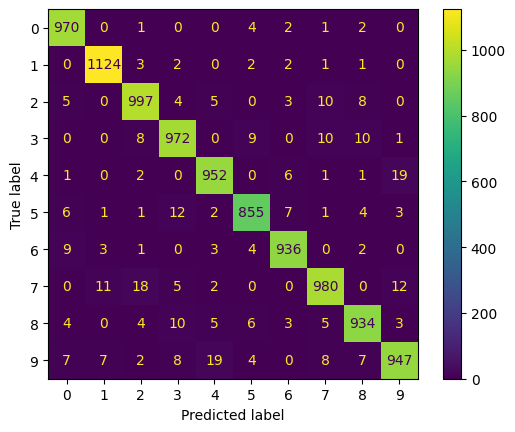

In [22]:
# Create a confusion matrix for the kernel SVM
confusion_matrix = confusion_matrix(y_te, y_predict_svm)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
cm_display.plot()
plt.show()

**2.3.4 Classification using KNN classifier**


In [ ]:
#Checking best parameters for KNN classification
for a in ['ball_tree', 'kd_tree']:
  for l in range(1, 60, 10):
    knn_class = KNeighborsClassifier(n_neighbors = 10, algorithm = a, leaf_size = l)
    knn_class.fit(X_tr, y_tr)

    knn_pred = knn_class.predict(X_te)
    print(f'Accuracy Score for {a} - {l}: {accuracy_score(y_te, knn_pred)}')

Accuracy Score for ball_tree - 1: 0.9497
Accuracy Score for ball_tree - 11: 0.9497
Accuracy Score for ball_tree - 21: 0.9497
Accuracy Score for ball_tree - 31: 0.9497
Accuracy Score for ball_tree - 41: 0.9497
Accuracy Score for ball_tree - 51: 0.9497
Accuracy Score for kd_tree - 1: 0.9497
Accuracy Score for kd_tree - 11: 0.9497
Accuracy Score for kd_tree - 21: 0.9497
Accuracy Score for kd_tree - 31: 0.9497
Accuracy Score for kd_tree - 41: 0.9497
Accuracy Score for kd_tree - 51: 0.9497


In [40]:
knn_cs = KNeighborsClassifier(n_neighbors = 10)
knn_cs.fit(X_tr, y_tr)

#Make predictions
knn_pred = knn_cs.predict(X_te)

#Get accuracy of KNN
knn_accuracy = accuracy_score(y_te, knn_pred)
print(f"Accuracy: {knn_accuracy}")

Accuracy: 0.9497


**2.3.5 Evaluating the performance of the classifiers using confusion matrices**

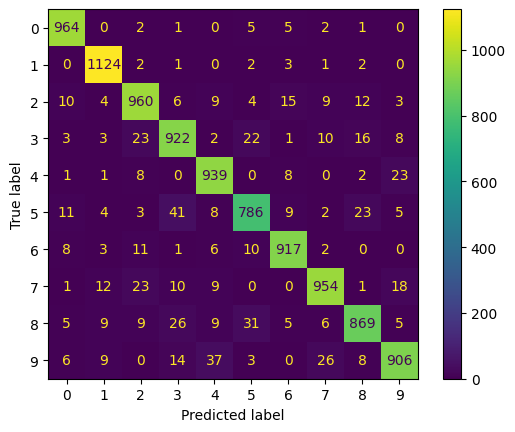

In [34]:
#Standard SVM Classifier COnfusion Matrix
ConfusionMatrixDisplay.from_estimator(mnist_svm, X_te, y_te)

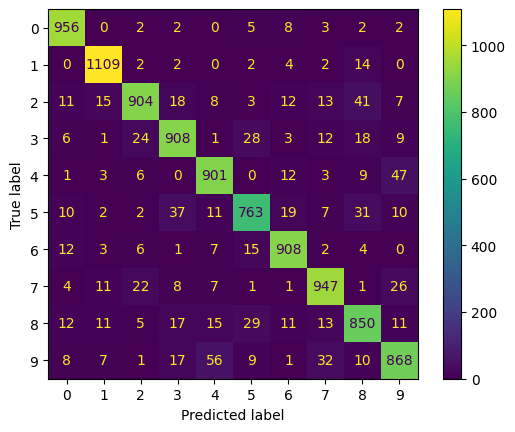

In [36]:
#confusion matrix for logisitc regression
ConfusionMatrixDisplay.from_estimator(logreg, X_te, y_te)

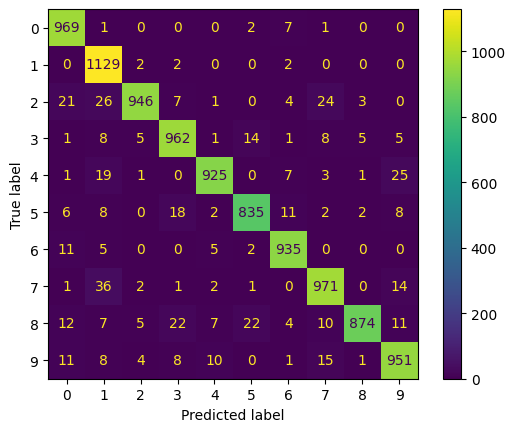

In [39]:
#KNN Confusion Matrix
ConfusionMatrixDisplay.from_estimator(knn_cs, X_te, y_te)

**Provide description of methods used (how did you choose tuning parameters) and give your thoughts about the performance of the methods and how they compare to each other:**


## Confusion Matrix Discussion:
Based on our confusion matrices above we can see that each of our models does a good job properly classifying our data, as the majority of the values are along the main diagonal meaning they are correct.

## Model Selection Notes
Each of our models had their tunning parameters found through two main methods, a grid search or a greedy search. Grid searches would check all possible parameter values for that given model on the training data, choosing the model with the best accuracy. A greedy search was done very similarly, but only checking on parameter at a time, and building upon previous choices. Accuracy continued to be our measurement of interest, though as noted in class this is not without its flaws. If future investigations were to be conducted including other such values such as recall and precision would be proper next steps. However considering how all our confusion matrices looked rather good it is just a matter of picking the best option out of a lot of good options. Our best model among them in terms of accuracy was Kernel SVM with an accuracy of 96.67%.

### Multiclass Logistic Regression
Based on our grid search, which explored values of C ranging from 0.25 to 2 and applied both L1 and L2 penalty terms using the liblinear solver, the optimal parameters were determined to be C = 0.50, penalty = L1, and solver = liblinear. The highest cross-validation accuracy achieved was 0.9046. Consequently, we will proceed by fitting our logistic regression model using these parameters. This model had an accuracy of 91.14%.

### Linear SVM
For inear multiclass SVM we check a huge variety of C values to find the most optimal score, as our kernel is already set to linear. In looking at these values we can see that 0.1 is the best choice of C so we chose to use that in the final model. In previous tests other parameter combinations didn't seem to effect the accuracy, but this was done via a greedy algorithm rather than a full grid search to save run time. This model had an accuracy of 93.41%.

### Kernel SVM
We implemented kernel SVM for classifying the MNIST dataset and specifically used the RBF (Radial Basis Function) kernel, which is known for its effectiveness in handling non-linear data. The RBF kernel maps input features into a higher-dimensional space, allowing the SVM to find a linear separating hyperplane in this transformed space. This approach is particularly useful for our dataset because it seems that the decision boundaries between different classes are not strictly linear. Our parameter C was set to the default value (1) after evaluating the model's performance with different values through cross-validation, balancing between training accuracy and generalization. Furthermore, the 'scale' setting was chosen for our gamma parameter because it adjusts $\gamma$ based on the data’s feature variance, typically providing a good balance between bias and variance. This setting ensures that gamma is automatically calculated to be appropriate for the dataset, leading to better generalization and performance."
Results on kernel SVM: "Based on the provided confusion matrix for the kernel SVM using the RBF kernel on the MNIST dataset, the classifier achieves an overall accuracy of approximately 96.67%. The digits 0, 1, 2, 3, and 7 demonstrate very high true positive rates, indicating exceptional accuracy for these classes. However, the digit 7 is notably misclassified more frequently, with 48 total misclassifications. The digit 7 can be often confused with digits 1, 2, and 9, with misclassfication highest at digit 2. Digits like 0, 1, and 6 exhibit very high precision and recall, reflecting the classifier’s strong performance for these digits. Overall, the SVM classifier performs well, with most digits being accurately classified.

### KNN classification
For the KNN classifier a number of algorithms were used, along with different leaf sizes. Throughout the experiment the accuracy score remained the same, indicating for this data using different algorithm or leaf numbers doesnt matter. The number of neighborhoods was never something we changed as we have 10 classes of digits and want to map those, so having fewer or more clusters would not make sense. This model had an accuracy of 94.97%

### 2.4  Visualization (2-dim.) via dimension reduction using PCA, kernelPCA with rbf kernel, t-SNE and LLE

**2.4.1 Provide a description and discussion of t-SNE here**

Also list the resources that you were using to learn about t-SNE.
- https://youtu.be/NEaUSP4YerM?si=NLABQOMpfx2-QOYf
- https://youtu.be/RJVL80Gg3lA?si=MPZDX48MSTDTm_QX

Some suggestions for resources: t-SNE was proposed in [van der Maaten and Hinton (2008): Visualizing Data with t-SNE, JMLR](https://www.jmlr.org/papers/volume9/vandermaaten08a/vandermaaten08a.pdf). You might also want to watch [this youtube video](https://www.youtube.com/watch?v=RJVL80Gg3lA) of a talk given by one of the creators of t-SNE.

**t-SNE Explanation:** t-SNE (t-distributed Stochastic Neighbor Embedding) is a nonlinear dimensionality reduction technique primarily used for visualizing high-dimensional data. It is particularly good at preserving local structures and forming clusters in a way that points close in high-dimensional space remain close in the lower-dimensional representation. Heres a brief overview of how t-SNE works:

- t-SNE first computes pairwise similarities between points in the high-dimensional space using a Gaussian distribution. This step transforms the high-dimensional Euclidean distances into conditional probabilities that represent similarities.

- It then seeks a low-dimensional embedding that reflects these similarities. t-SNE uses a Student-t distribution to measure similarities between points in the low-dimensional space, which helps handle the crowding problem.
The algorithm iteratively minimizes the difference between the two probability distributions (high-dimensional and low-dimensional) using a gradient descent method.



**2.4.2 Finding PCA embeddings**

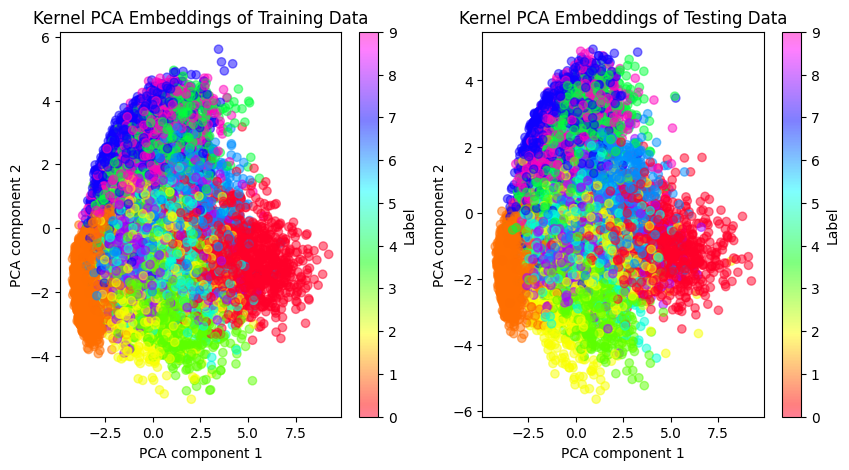

In [7]:
# Perform Kernel PCA on the training data
k = 2  # Number of principal components
pca = PCA(n_components=k)

#Fit Kernel PCA on the training data
X_tr_pca = pca.fit_transform(X_tr)
X_te_pca = pca.transform(X_te)

#Visualize the Kernel PCA embeddings
plt.figure(figsize=(10, 5))

#Training data plot
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_tr_pca[:, 0], X_tr_pca[:, 1], c=y_tr, cmap='gist_rainbow', alpha=0.5)
plt.colorbar(scatter, label='Label')
plt.title('Kernel PCA Embeddings of Training Data')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')

#Testing data plot
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_te_pca[:, 0], X_te_pca[:, 1], c=y_te, cmap='gist_rainbow', alpha=0.5)
plt.colorbar(scatter, label='Label')
plt.title('Kernel PCA Embeddings of Testing Data')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')

plt.show()

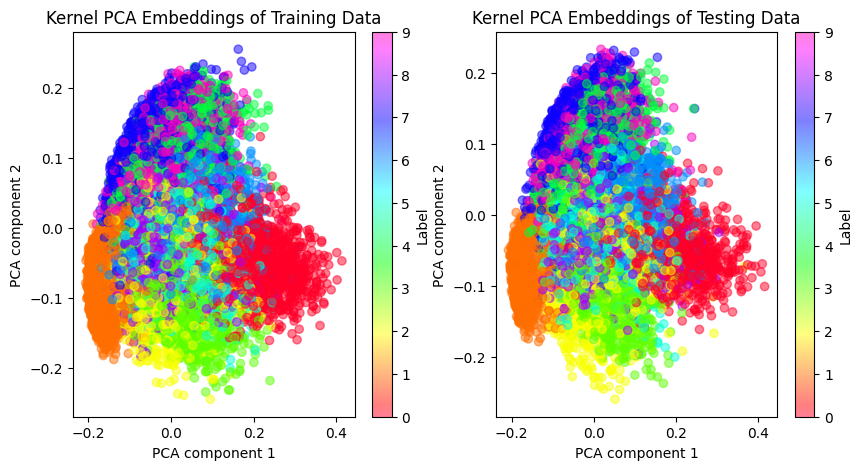

In [ ]:
# Perform Kernel PCA on the training data
k = 2  # Number of principal components
kernel_pca = KernelPCA(n_components=k, kernel='rbf')

#Fit Kernel PCA on the training data
X_tr_kpca = kernel_pca.fit_transform(X_tr)
X_te_kpca = kernel_pca.transform(X_te)

#Visualize the Kernel PCA embeddings
plt.figure(figsize=(10, 5))

#Training data plot
plt.subplot(1, 2, 1)
scatter = plt.scatter(X_tr_kpca[:, 0], X_tr_kpca[:, 1], c=y_tr, cmap='gist_rainbow', alpha=0.5)
plt.colorbar(scatter, label='Label')
plt.title('Kernel PCA Embeddings of Training Data')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')

#Testing data plot
plt.subplot(1, 2, 2)
scatter = plt.scatter(X_te_kpca[:, 0], X_te_kpca[:, 1], c=y_te, cmap='gist_rainbow', alpha=0.5)
plt.colorbar(scatter, label='Label')
plt.title('Kernel PCA Embeddings of Testing Data')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')

plt.show()

**2.4.5 Finding embeddings using t-SNE**

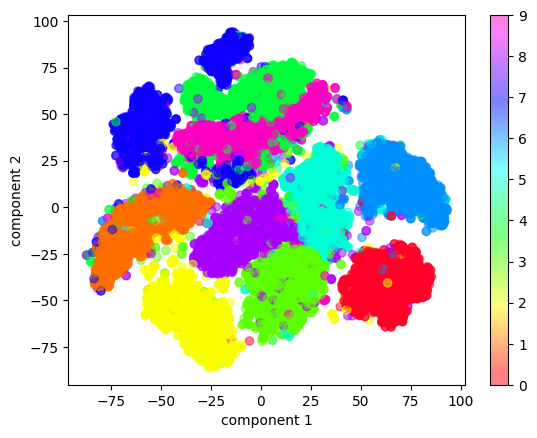

In [ ]:
mni_tsne = TSNE(n_components = 2) #Since we have >4 digit types we use exact
tsne_projected = mni_tsne.fit_transform(X_tr)

#Fun projection like what Prof W. did
plt.scatter(tsne_projected[:, 0], tsne_projected[:, 1], c = y_tr, cmap = 'gist_rainbow', alpha = 0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()

# ===== tSNE for TEST data =====
mni_ts_tsne = TSNE(n_components = 2) #Since we have >4 digit types we use exact
tsne_ts_projected = mni_tsne.fit_transform(X_te)

**2.4.6 Application of KNN classifier to the 2-dimensional embeddings**

**2.4.6a: Application of KNN to PCA**

KNN accuracy on PCA embeddings: 0.43


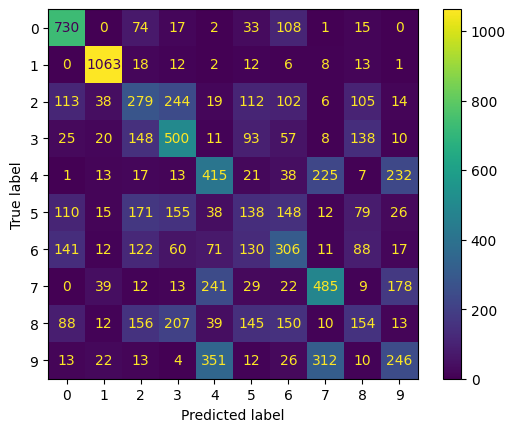

In [12]:
# Train and evaluate KNN on PCA embeddings
knn_pca = KNeighborsClassifier(n_neighbors=10)
knn_pca.fit(X_tr_pca, y_tr)
y_te_pred_pca = knn_pca.predict(X_te_pca)
accuracy_pca = accuracy_score(y_te, y_te_pred_pca)

print(f'KNN accuracy on PCA embeddings: {accuracy_pca:.2f}')

p_kpca = ConfusionMatrixDisplay(confusion_matrix(y_te, y_te_pred_pca))
p_kpca.plot()

**2.4.6d: Application of KNN to t-SNE**

tSNE + KNN Accuracy: 0.1269


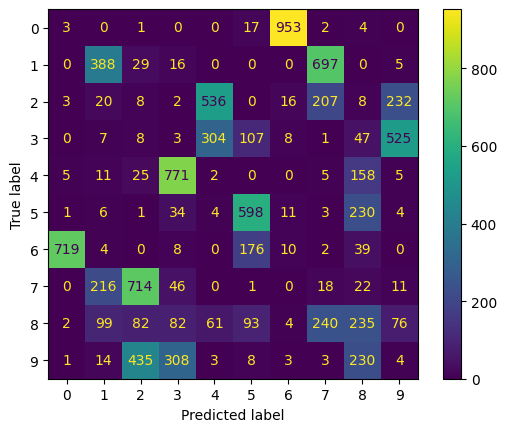

In [ ]:
#Fit the tSNE data to KNN model
knn_tsne = KNeighborsClassifier(n_neighbors = 10)
knn_tsne.fit(tsne_projected, y_tr)

#Predict on the PCA test data
tsne_pred = knn_tsne.predict(tsne_ts_projected)
tsne_knn_acc = accuracy_score(y_te, tsne_pred)
print('tSNE + KNN Accuracy:', tsne_knn_acc)

p = ConfusionMatrixDisplay(confusion_matrix(y_te, tsne_pred))
p.plot()

[]

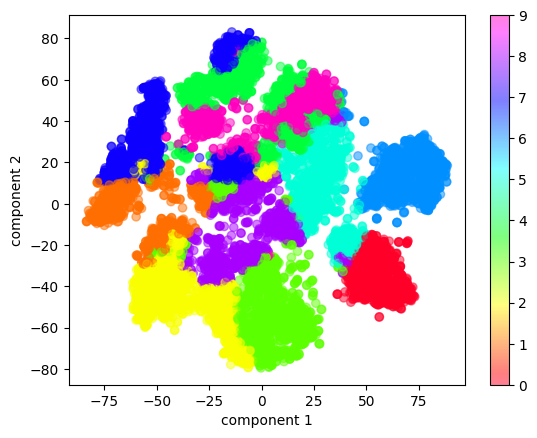

In [ ]:
tsne_match = []
for i in range(len(y_te_pred_pca)):
  if tsne_pred[i] == y_te[i]:
    tsne_match.append(1)
  else:
    tsne_match.append(0)

plt.scatter(tsne_ts_projected[:, 0], tsne_ts_projected[:, 1], c = tsne_pred, cmap = 'gist_rainbow', alpha = 0.5)
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.plot()

**Add discussion of your observations and your process here:**  When comparing the performance of the k-nearest neighbors (KNN) classifier on MNIST data processed through PCA the results clearly demonstrate the strength of the dimensionality reduction technique. KNN achieved an accuracy of 0.43 on PCA embeddings, indicating that PCA effectively captured the essential linear structures within the MNIST dataset, leading to a more accurate classification. On the other hand, the KNN classifier's accuracy dropped to 0.1269 when using the t-SNE embeddings. The higher accuracy with PCA suggests that the dimension reduction techniques used in PCA is more suitable for this type of image data, effectively preserving the critical features necessary for accurate KNN classification. In conclusion, PCA is a more reliable choice than t-SNE for enhancing the performance of the KNN classifier.

**2.5 Data Augmentation:**

For this part implement the KDE bootstrap algorithm to then reconstruct our images. To do this we first use the KDE algorithm to create the multinomial distribution and then sample specific points on that distribution by sampling a smaller normal distribution there. In practice because we cannot 100% recreate the multinomial distribution, we instead randomly select a data point (one of the embedings) and sample a normal distribution there with mean equal to embedding and variance equal to the bandwith.

From there we use these KDE approximations to reconstruct the image by multiplying them with the top k eigenvalues. Below you can see a random set of the images generated from this process.


In [ ]:
def K(x):
  return 1/(2*np.pi) * np.exp(-0.5 * np.linalg.norm(x, ord = len(x))**2)

def sample_gauss_KDE(N,data,bandwith):
  '''
  This function takes: N, the number of samples to draw, the input data (k-dimensional PCA embeddings), and
  the bandwidth for kernel density estimation;
  The output of this function should be the N samples drawn from a distribution whose pdf is given by the KDE
  '''

  #randomly choose N pics from `data`
  sample_choices = np.random.choice([x for x in range(len(data))], N)

  #Return N random samples from KDE
  KDE_samples = []
  for i in sample_choices:
    KDE_samples.append(np.random.multivariate_normal(data[i], bandwith * np.eye(data.shape[1]), 1))

  print('KDE Shape:', np.array(KDE_samples).shape)

  return KDE_samples

In [ ]:
def image_reconst(k,eig_vectors,samples):
  '''This function takes: the number k of eigen_vectors used in the reconstruction; the k eigenvectors you use in
   the reconstruction and samples drawn with sample_gauss_KDE'''

  #Remake the samples into a nice dimension
  samples = np.array(samples)
  sample_redone = np.zeros((samples.shape[0], samples.shape[-1]))

  for i in range(15000):
    sample_redone[i,:] = samples[i, 0]
  samples = sample_redone

  #Reconstruct the eigen vectors timmes our samples
  sigma = np.zeros((15000, 784))

  for d in range(samples.shape[0]):
    for r in range(2):
      a = np.dot(samples[d, 0:k-1], eig_vectors[0:k-1])
      sigma[d, :] = a

  #seperate the sigma into seperate images
  image = []
  for i in range(sigma.shape[0]):
    im = sigma[i, :]
    image.append(im)

  return image

In [ ]:
k = 15

pca_daug = PCA(n_components = k)
pca_daug_projected = pca_daug.fit_transform(X_tr)

kde_samples = sample_gauss_KDE(pca_daug_projected.shape[0], pca_daug_projected, 0.1)
recons_imgs = image_reconst(k, pca_daug.components_, kde_samples)

KDE Shape: (15000, 1, 15)


Plot 9 newly constructed figures

(15000, 784)


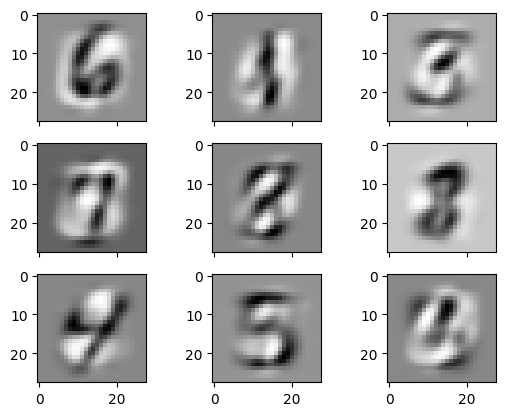

In [ ]:
fig, axs = plt.subplots(3, 3, sharex=True)
print(np.array(recons_imgs).shape)

#Pick 10 random digits to sample
sample_choices = np.random.choice([x for x in range(15000)], 10)

k = 0
for i in range(3):
  for j in range(3):
    axs[i][j].imshow(recons_imgs[sample_choices[k]].reshape((28,28)), cmap = 'Greys')
    k += 1

plt.show()